In [1]:
%matplotlib notebook

In [2]:
#import dependencies 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from scipy import stats

In [3]:
# import and read data from .csv create original dataframe
sleep_df = pd.read_csv("resources/Marqueze et al.csv")

In [4]:
#print dataframe 
sleep_df

,id,Gender,Age,Satlazer,Countrycat,Workhourtotal1cat,Enoughsleepcat,Educationlevel,Satworkhour2,SleepQualitycat,...,Work5cat,Depression,Country_Occup_Work5,Sunworkmonth_H,Sunfreemonth_H,SUNWORKFREEMONTH_HOUR,Occup_Work5,Work3cat2,SUNWORKMONTH_HOUR_Mean_INV,SUNWORKMONTH_HOUR_Median_INV
0,1,1,33.0,1,0,0.0,0.0,2.0,1,0.0,...,1,0.0,3,140.0,24.0,106.86,3,1,0,0
1,2,1,64.0,0,0,1.0,0.0,1.0,0,0.0,...,1,0.0,3,160.0,8.0,116.57,3,1,0,0
2,3,1,39.0,0,0,1.0,1.0,2.0,1,0.0,...,1,1.0,3,160.0,NaN,NaN,3,1,0,0
3,4,1,36.0,0,0,1.0,0.0,2.0,2,0.0,...,1,1.0,3,120.0,16.0,90.29,3,1,0,1
4,5,1,22.0,0,0,1.0,0.0,2.0,0,0.0,...,1,0.0,3,100.0,8.0,73.71,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,580289,1,43.0,0,1,0.0,0.0,2.0,0,0.0,...,3,0.0,1,32.0,24.0,28.57,1,0,0,0
1757,580343,0,27.0,0,1,0.0,0.0,0.0,0,0.0,...,3,0.0,1,8.0,18.0,12.29,1,0,1,1
1758,580345,1,43.0,1,1,0.0,0.0,3.0,1,0.0,...,4,0.0,2,32.0,24.0,28.57,2,1,0,0
1759,580350,1,40.0,0,1,0.0,0.0,3.0,0,0.0,...,3,0.0,1,8.0,18.0,12.29,1,0,1,1


In [5]:
#show column titles 
sleep_df.columns

Index(['id', 'Gender', 'Age', 'Satlazer', 'Countrycat', 'Workhourtotal1cat',
       'Enoughsleepcat', 'Educationlevel', 'Satworkhour2', 'SleepQualitycat',
       'AwakeningProblemscat', 'Sleepinesscat', 'Bedtimew', 'Uptimew',
       'Bedtimef', 'Uptimef', 'Midsleepfreemean', 'Painneck_lowback',
       'Work5cat', 'Depression', 'Country_Occup_Work5', 'Sunworkmonth_H',
       'Sunfreemonth_H', 'SUNWORKFREEMONTH_HOUR', 'Occup_Work5', 'Work3cat2',
       'SUNWORKMONTH_HOUR_Mean_INV', 'SUNWORKMONTH_HOUR_Median_INV'],
      dtype='object')

In [33]:
sleep_df.dropna(inplace=True)

In [35]:
sleep_df.count()

id                              1534
Gender                          1534
Age                             1534
Satlazer                        1534
Countrycat                      1534
Workhourtotal1cat               1534
Enoughsleepcat                  1534
Educationlevel                  1534
Satworkhour2                    1534
SleepQualitycat                 1534
AwakeningProblemscat            1534
Sleepinesscat                   1534
Bedtimew                        1534
Uptimew                         1534
Bedtimef                        1534
Uptimef                         1534
Midsleepfreemean                1534
Painneck_lowback                1534
Work5cat                        1534
Depression                      1534
Country_Occup_Work5             1534
Sunworkmonth_H                  1534
Sunfreemonth_H                  1534
SUNWORKFREEMONTH_HOUR           1534
Occup_Work5                     1534
Work3cat2                       1534
SUNWORKMONTH_HOUR_Mean_INV      1534
S

In [6]:
#create new dataframe/variable by subtracting the time individuals went to bed from the time they woke up for Workdays 
time_sleptw = sleep_df["Uptimew"]-sleep_df["Bedtimew"]
print(time_sleptw)

0       5.67
1       6.67
2       8.00
3       8.00
4       7.50
        ... 
1756    6.00
1757    6.67
1758    7.50
1759    8.00
1760    3.50
Length: 1761, dtype: float64


In [7]:
##create new dataframe/variable by subtracting the time individuals went to bed from the time they woke up for Free day
time_sleptf = sleep_df["Uptimef"]-sleep_df["Bedtimef"]
time_sleptf

0        9.67
1        8.67
2        8.00
3       10.50
4        9.50
        ...  
1756     8.00
1757    10.00
1758     9.50
1759     6.00
1760     4.75
Length: 1761, dtype: float64

In [8]:
#add and title the new the new column to the sleep_df dataframe 
sleep_df["Time Slept w/ Work"]= time_sleptw

In [9]:
#add and title the new the new column to the sleep_df dataframe 
sleep_df["Time Slept w/ Free Time"]= time_sleptf

In [10]:
#show new columns added to dataframe 
sleep_df.columns

Index(['id', 'Gender', 'Age', 'Satlazer', 'Countrycat', 'Workhourtotal1cat',
       'Enoughsleepcat', 'Educationlevel', 'Satworkhour2', 'SleepQualitycat',
       'AwakeningProblemscat', 'Sleepinesscat', 'Bedtimew', 'Uptimew',
       'Bedtimef', 'Uptimef', 'Midsleepfreemean', 'Painneck_lowback',
       'Work5cat', 'Depression', 'Country_Occup_Work5', 'Sunworkmonth_H',
       'Sunfreemonth_H', 'SUNWORKFREEMONTH_HOUR', 'Occup_Work5', 'Work3cat2',
       'SUNWORKMONTH_HOUR_Mean_INV', 'SUNWORKMONTH_HOUR_Median_INV',
       'Time Slept w/ Work', 'Time Slept w/ Free Time'],
      dtype='object')

In [11]:
#replace numerical values for depression with yes and no 



In [12]:
sleep_df["Depression"].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Depression, dtype: float64

In [13]:
#Create a new dataframe for the Yes/No values and Group the values by their values. Giving the average time slept for all yes and no
sleep_df_yn_w_group = sleep_df.groupby("Depression").mean()["Time Slept w/ Work"]

In [14]:
sleep_df_yn_w_group

Depression
0.0    6.844969
1.0    6.643900
Name: Time Slept w/ Work, dtype: float64

<IPython.core.display.Javascript object>


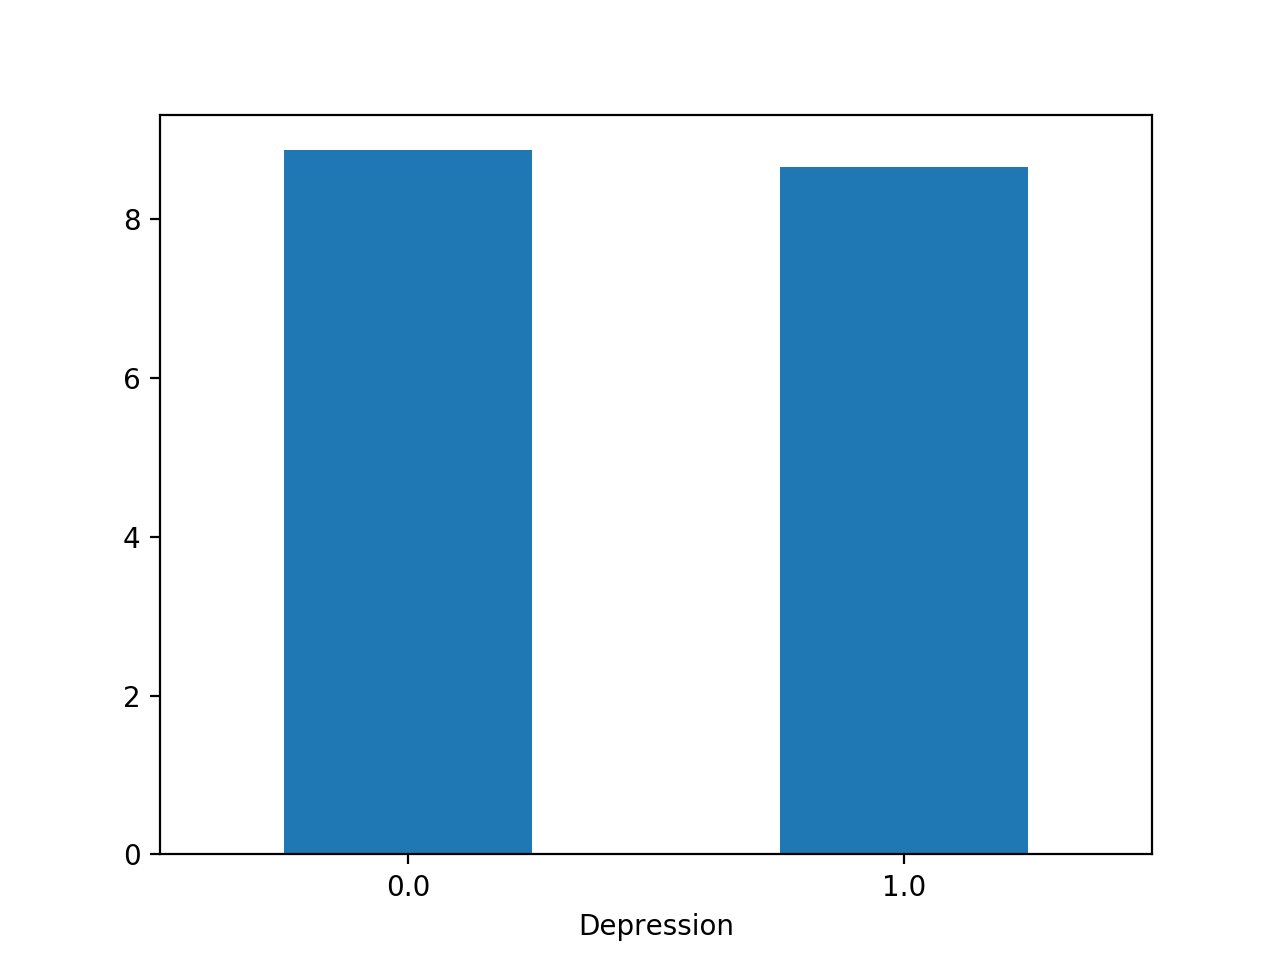

In [15]:
#create bar chart with yes/no dataframe 
sleep_df_yn_w_group.plot.bar(rot=0)
plt.show()

In [16]:
#Create a new dataframe for the Yes/No values and Group the values by their values. Giving the average time slept for all yes and no
sleep_df_yn_f_group = sleep_df.groupby("Depression").mean()['Time Slept w/ Free Time']


In [17]:
#create bar chart with yes/no dataframe 
sleep_df_yn_f_group.plot.bar(rot=0)
plt.show()

In [18]:
#create new filtered dataframe for Depression
sleep_df_dep_w_filtered = sleep_df.loc[:,["Depression", "Time Slept w/ Work"]]

<IPython.core.display.Javascript object>


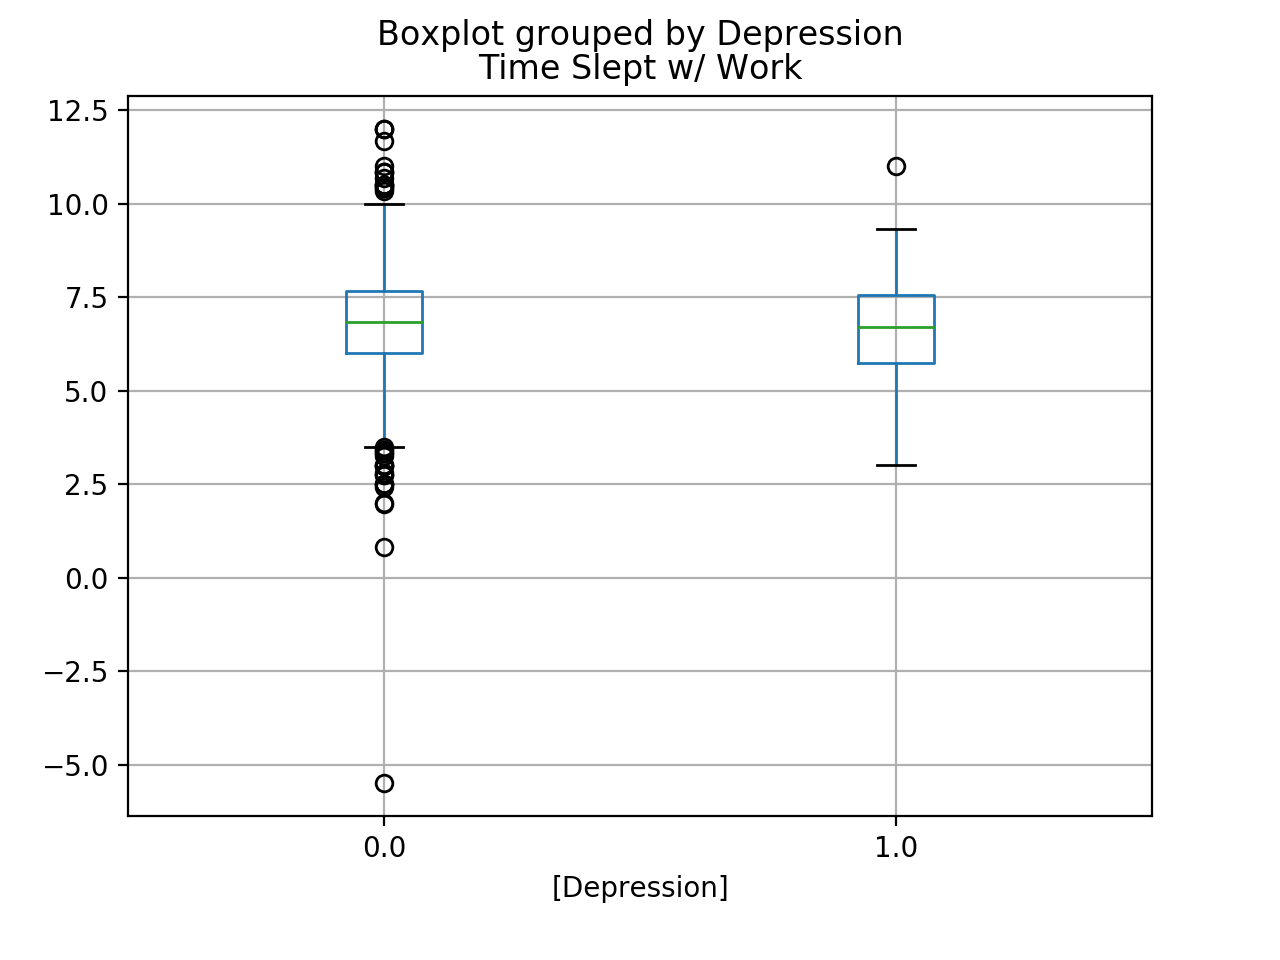

In [19]:
#create new boxplot for Dpression and Time slept with work 
sleep_df_dep_w_filtered.boxplot(column=['Time Slept w/ Work'],by=['Depression']) 

In [20]:
#create new filtered dataframe for Depression
sleep_df_dep_f_filtered = sleep_df.loc[:,["Depression", "Time Slept w/ Free Time"]]

<IPython.core.display.Javascript object>


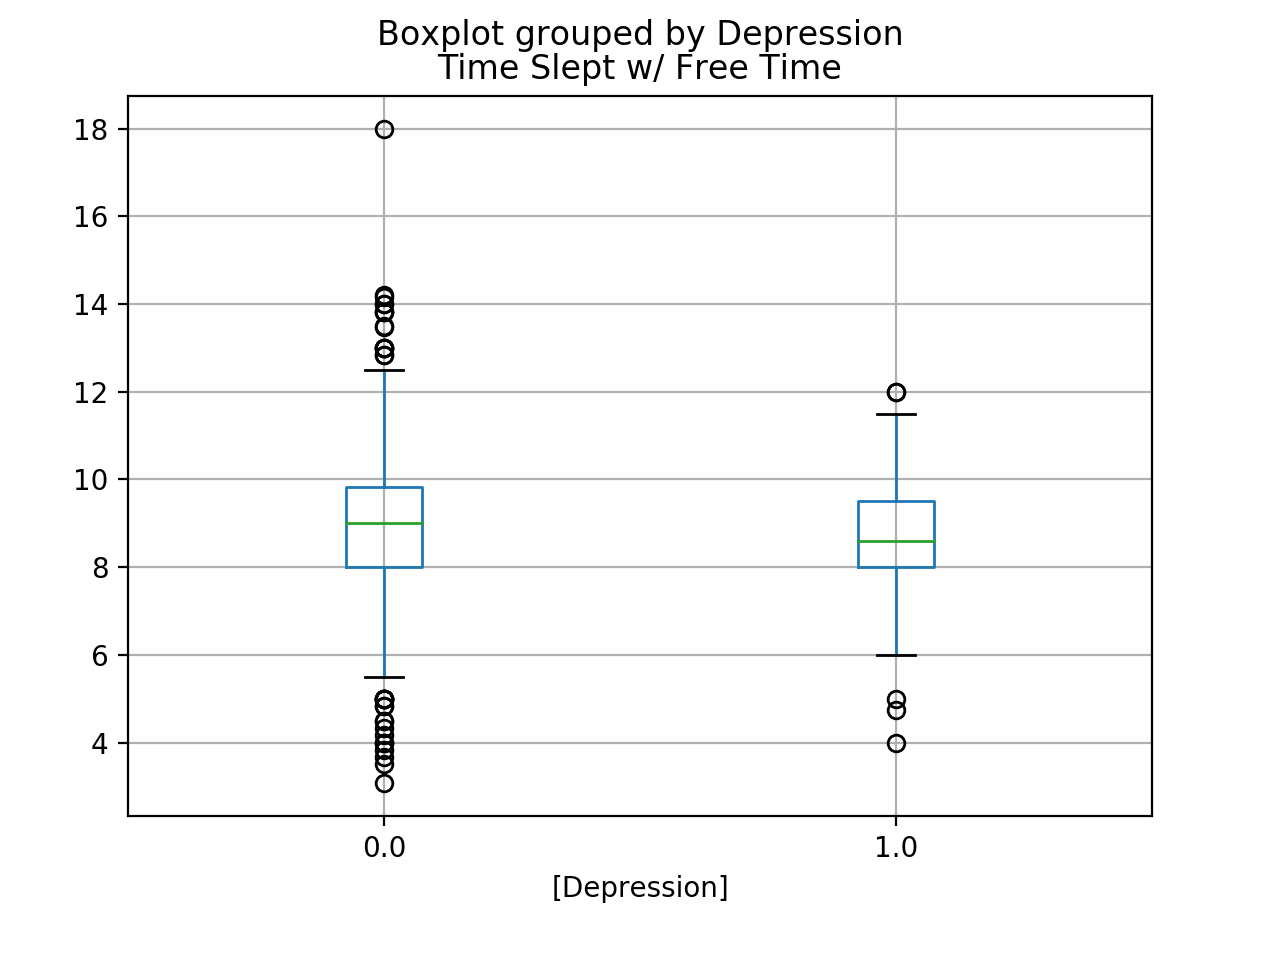

In [21]:
#create new boxplot for Dpression and Time slept with work 
sleep_df_dep_f_filtered.boxplot(column=['Time Slept w/ Free Time'],by=['Depression']) 

In [22]:
#replace numerical values for Country categories with Brazil and Sweden
sleep_df["Countrycat"].replace([0, 1], ["Brazil", "Sweden"], inplace=True)

In [23]:
sleep_df["Countrycat"].head(1200)

0       Brazil
1       Brazil
2       Brazil
3       Brazil
4       Brazil
         ...  
1195    Sweden
1196    Sweden
1197    Sweden
1198    Sweden
1199    Sweden
Name: Countrycat, Length: 1200, dtype: object

In [24]:
#Create a new dataframe for the Yes/No values and Group the values by their values. Giving the average time slept for all yes and no
sleep_df_br_group = sleep_df.groupby("Countrycat").mean()['Time Slept w/ Work']



In [26]:
sleep_df.columns

Index(['id', 'Gender', 'Age', 'Satlazer', 'Countrycat', 'Workhourtotal1cat',
       'Enoughsleepcat', 'Educationlevel', 'Satworkhour2', 'SleepQualitycat',
       'AwakeningProblemscat', 'Sleepinesscat', 'Bedtimew', 'Uptimew',
       'Bedtimef', 'Uptimef', 'Midsleepfreemean', 'Painneck_lowback',
       'Work5cat', 'Depression', 'Country_Occup_Work5', 'Sunworkmonth_H',
       'Sunfreemonth_H', 'SUNWORKFREEMONTH_HOUR', 'Occup_Work5', 'Work3cat2',
       'SUNWORKMONTH_HOUR_Mean_INV', 'SUNWORKMONTH_HOUR_Median_INV',
       'Time Slept w/ Work', 'Time Slept w/ Free Time'],
      dtype='object')

In [27]:
# stats_df = sleep_df[['Depression', 'Time Slept w/ Work']]
# stats_df

yes_pop = sleep_df[sleep_df['Depression'] == 'Yes']
no_pop = sleep_df[sleep_df['Depression'] == 'No']

/Users/giuliochiappolini/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [29]:
sleep_df_yn_w_group.head()

Depression
0.0    6.844969
1.0    6.643900
Name: Time Slept w/ Work, dtype: float64

In [30]:
x_val = sleep_df_yn_w_group[0] #np.mean(sleep_df_yn_w_group['No'])
y_val = sleep_df_yn_w_group[1] #np.mean(sleep_df_yn_w_group['Yes'])

In [31]:
stats.ttest_ind(yes_pop, no_pop, equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [36]:
n_pop = sleep_df.loc[sleep_df["Depression"] == 0, "Time Slept w/ Work"]
y_pop = sleep_df.loc[sleep_df["Depression"] == 1, "Time Slept w/ Work"]

stats.ttest_ind(y_pop, n_pop, equal_var=False)

Ttest_indResult(statistic=-1.742975773144947, pvalue=0.08450274306730471)

In [37]:
n_pop = sleep_df.loc[sleep_df["Depression"] == 0, "Time Slept w/ Free Time"]
y_pop = sleep_df.loc[sleep_df["Depression"] == 1, "Time Slept w/ Free Time"]

stats.ttest_ind(y_pop, n_pop, equal_var=False)

Ttest_indResult(statistic=-1.5218689171682855, pvalue=0.13129521932015384)